In [15]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 400)
data = load_cfb_pbp(seasons=[YEAR], return_as_pandas=True)
data.head(200)

100%|██████████| 1/1 [00:01<00:00,  1.60s/it]


,id,sequenceNumber,text,awayScore,homeScore,scoringPlay,priority,modified,wallclock,statYardage,type.id,type.text,type.abbreviation,period.number,clock.displayValue,start.down,start.distance,start.yardLine,start.yardsToEndzone,start.team.id,end.down,end.distance,end.yardLine,end.yardsToEndzone,end.downDistanceText,end.shortDownDistanceText,end.possessionText,end.team.id,start.downDistanceText,start.shortDownDistanceText,start.possessionText,mediaId,scoringType.name,scoringType.displayName,scoringType.abbreviation,drive.id,drive.displayResult,drive.isScore,drive.team.shortDisplayName,drive.team.displayName,drive.team.name,drive.team.abbreviation,drive.yards,drive.offensivePlays,drive.result,drive.description,drive.shortDisplayResult,drive.timeElapsed.displayValue,drive.start.period.number,drive.start.period.type,drive.start.yardLine,drive.start.clock.displayValue,drive.start.text,drive.end.period.number,drive.end.period.type,drive.end.yardLine,drive.end.clock.displayValue,game_id,season,seasonType,homeTeamId,awayTeamId,homeTeamName,awayTeamName,homeTeamMascot,awayTeamMascot,homeTeamAbbrev,awayTeamAbbrev,homeTeamNameAlt,awayTeamNameAlt,homeTeamSpread,gameSpread,gameSpreadAvailable,overUnder,homeFavorite,clock.minutes,clock.seconds,half,lag_half,lead_half,start.TimeSecsRem,start.adj_TimeSecsRem,game_play_number,start.pos_team.id,start.def_pos_team.id,end.def_team.id,end.pos_team.id,end.def_pos_team.id,start.pos_team.name,start.def_pos_team.name,end.pos_team.name,end.def_pos_team.name,start.is_home,end.is_home,homeTimeoutCalled,awayTimeoutCalled,end.homeTeamTimeouts,end.awayTeamTimeouts,start.homeTeamTimeouts,start.awayTeamTimeouts,end.TimeSecsRem,end.adj_TimeSecsRem,start.posTeamTimeouts,start.defPosTeamTimeouts,end.posTeamTimeouts,end.defPosTeamTimeouts,firstHalfKickoffTeamId,period,start.yard,end.yard,playType,week,lag_scoringPlay,end_of_half,down_1,down_2,down_3,down_4,down_1_end,down_2_end,down_3_end,down_4_end,scoring_play,td_play,touchdown,td_check,safety,fumble_vec,forced_fumble,kickoff_play,kickoff_tb,kickoff_onside,kickoff_oob,kickoff_fair_catch,kickoff_downed,kick_play,kickoff_safety,punt,punt_play,punt_tb,punt_oob,punt_fair_catch,punt_downed,punt_safety,penalty_safety,punt_blocked,rush,pass,sack_vec,pos_team,def_pos_team,is_home,lag_HA_score_diff,HA_score_diff,net_HA_score_pts,H_score_diff,A_score_diff,lag_homeScore,lag_awayScore,start.homeScore,start.awayScore,end.homeScore,end.awayScore,pos_team_score,def_pos_team_score,start.pos_team_score,start.def_pos_team_score,start.pos_score_diff,end.pos_team_score,end.def_pos_team_score,end.pos_score_diff,lag_pos_team,lead_pos_team,lead_pos_team2,pos_score_diff,lag_pos_score_diff,pos_score_pts,pos_score_diff_start,start.pos_team_receives_2H_kickoff,end.pos_team_receives_2H_kickoff,change_of_poss,penalty_flag,penalty_declined,penalty_no_play,penalty_offset,penalty_1st_conv,penalty_in_text,penalty_detail,penalty_text,yds_penalty,sack,int,int_td,completion,pass_attempt,target,pass_breakup,pass_td,rush_td,turnover_vec,offense_score_play,defense_score_play,downs_turnover,yds_punted,yds_punt_gained,fg_attempt,fg_made,yds_fg,pos_unit,def_pos_unit,lead_play_type,sp,play,scrimmage_play,change_of_pos_team,pos_score_diff_end,fumble_lost,fumble_recovered,yds_rushed,yds_receiving,yds_int_return,yds_kickoff,yds_kickoff_return,yds_punt_return,yds_fumble_return,yds_sacked,sack_players,rush_player_name,receiver_player_name,passer_player_name,sack_player_name,sack_player_name2,interception_player_name,pass_breakup_player_name,fg_kicker_player_name,fg_return_player_name,fg_block_player_name,punter_player_name,punt_return_player_name,punt_block_player_name,punt_block_return_player_name,kickoff_player_name,kickoff_return_player_name,fumble_player_name,fumble_forced_player_name,fumble_recovered_player_name,rusher_player_name,new_down,new_distance,middle_8,rz_play,scoring_opp,stuffed_run,stopped_run,opportunity_run,highlight_run,adj_rush_yardage,line_yards,second_level_yards,open_field_yards,highlig

In [18]:

print(data['text'].str.contains('left|right|middle', case=False).sum())


2340


100%|██████████| 1/1 [00:01<00:00,  1.91s/it]
C:\Users\RaymondCarpenter\AppData\Local\Temp\ipykernel_30680\822660039.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data_passing['pass_attempt'] = 1  # Each row is a pass attempt
C:\Users\RaymondCarpenter\AppData\Local\Temp\ipykernel_30680\822660039.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data_passing['pass_attempt'] = game_data_passing['pass_attempt'].astype(int)
C:\Users\RaymondCarpenter\AppData\Local\Temp\ipykernel_30680\8226600

Available game IDs for Alabama: <ArrowExtensionArray>
[401281942, 401282056, 401282071, 401282081, 401282089, 401282103, 401282107,
 401282111, 401282120, 401282127, 401282135, 401282146, 401282154, 401331235,
 401331242]
Length: 15, dtype: int64[pyarrow]
Index(['id', 'sequenceNumber', 'text', 'awayScore', 'homeScore', 'scoringPlay',
       'priority', 'modified', 'wallclock', 'statYardage',
       ...
       'sack_weight', 'pass_weight', 'rush_weight', 'pen_weight',
       'action_play', 'athlete_name', 'pointAfterAttempt.id',
       'pointAfterAttempt.text', 'pointAfterAttempt.abbreviation',
       'pointAfterAttempt.value'],
      dtype='object', length=370)
Total EPA: 15.037316858768463
Total Plays: 37
EPA per Play: 0.4064139691559044


KeyError: 'rush_attempt'

In [12]:
# Since no specific 'rush_attempt' column exists, assume each row in game_data_rushing is a rushing attempt
rush_attempts = game_data_rushing.shape[0]  # Each row represents one rushing attempt
rush_yards = game_data_rushing['statYardage'].sum()

# Adjust touchdowns if necessary
if 'rush_td' in game_data_rushing.columns:
    rush_touchdowns_col = 'rush_td'
elif 'touchdown' in game_data_rushing.columns:
    rush_touchdowns_col = 'touchdown'
else:
    raise ValueError("No column found for rushing touchdowns.")
rush_touchdowns = game_data_rushing[rush_touchdowns_col].astype(int).sum()

# Output the results
print(f"Rushing Attempts: {rush_attempts}")
print(f"Rushing Yards: {rush_yards}")
print(f"Rushing Touchdowns: {rush_touchdowns}")


Rushing Attempts: 1
Rushing Yards: 8
Rushing Touchdowns: 0


100%|██████████| 1/1 [00:05<00:00,  5.17s/it]


Available game IDs for Alabama: <ArrowExtensionArray>
[401281942, 401282056, 401282071, 401282081, 401282089, 401282103, 401282107,
 401282111, 401282120, 401282127, 401282135, 401282146, 401282154, 401331235,
 401331242]
Length: 15, dtype: int64[pyarrow]


C:\Users\RaymondCarpenter\AppData\Local\Temp\ipykernel_30680\1322310485.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data_passing['pass_attempt'] = 1  # Each row is a pass attempt
C:\Users\RaymondCarpenter\AppData\Local\Temp\ipykernel_30680\1322310485.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_data_passing['pass_attempt'] = game_data_passing['pass_attempt'].astype(int)
C:\Users\RaymondCarpenter\AppData\Local\Temp\ipykernel_30680\1322310485.py:65: SettingWithCopyWarning: 
A value 

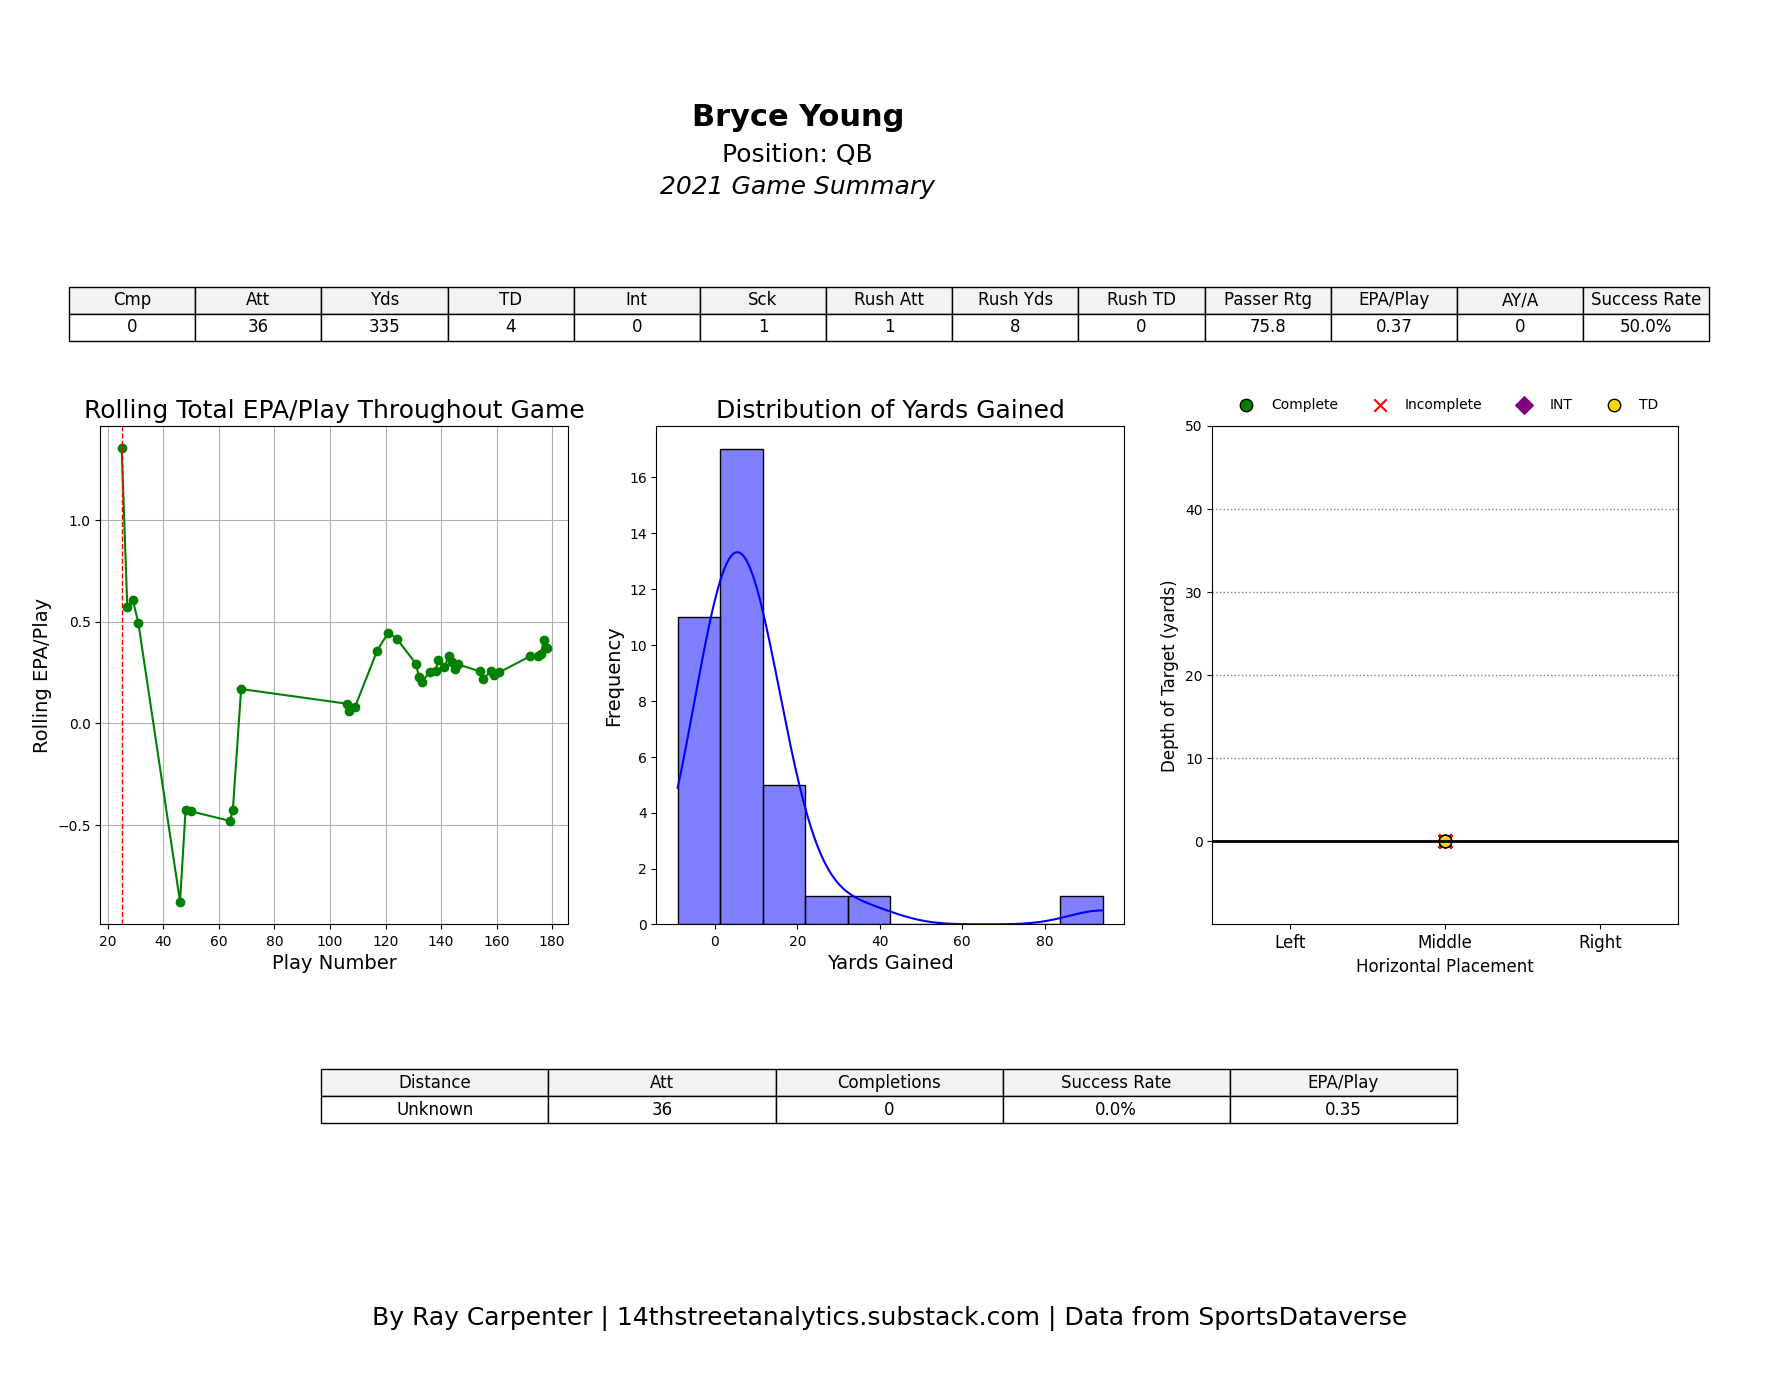

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
from sportsdataverse.cfb import load_cfb_pbp

# Define the year and load the CFB data
YEAR = 2021
data = load_cfb_pbp(seasons=[YEAR], return_as_pandas=True)

# Set options for displaying dataframes
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 400)

# Define the player and team names
player_name = 'Bryce Young'  # Adjust to the player's name
team_name = 'Alabama'        # Adjust to the team's name

# Adjust filtering based on actual column names
# The home and away team names are in 'homeTeamName' and 'awayTeamName'
filtered_df = data[(data['homeTeamName'] == team_name) | (data['awayTeamName'] == team_name)]

# Adjust player column names if necessary
if 'passer_player_name' in data.columns:
    passer_col = 'passer_player_name'
elif 'passer' in data.columns:
    passer_col = 'passer'
elif 'athlete_name' in data.columns:
    passer_col = 'athlete_name'
else:
    raise ValueError("No column found for passer's name.")

if 'rusher_player_name' in data.columns:
    rusher_col = 'rusher_player_name'
elif 'rusher' in data.columns:
    rusher_col = 'rusher'
else:
    raise ValueError("No column found for rusher's name.")

# Separate filters for passing and rushing plays
passing_plays = filtered_df[filtered_df[passer_col] == player_name]
rushing_plays = filtered_df[filtered_df[rusher_col] == player_name]

# Filter game data by game_id
game_ids = filtered_df['game_id'].unique()
print(f"Available game IDs for {team_name}: {game_ids}")

# Select a specific game ID (choose one from the printed list)
game_id = game_ids[0]  # Adjust to select a specific game
game_data_passing = passing_plays[passing_plays['game_id'] == game_id]
game_data_rushing = rushing_plays[rushing_plays['game_id'] == game_id]

# Check if 'pass_result' exists and adjust accordingly
if 'pass_result' in game_data_passing.columns:
    pass_result_col = 'pass_result'
elif 'completion' in game_data_passing.columns:
    pass_result_col = 'completion'
else:
    raise ValueError("No column found for pass result.")

# Calculate cumulative completions and attempts for passing plays
game_data_passing['pass_attempt'] = 1  # Each row is a pass attempt
game_data_passing['pass_attempt'] = game_data_passing['pass_attempt'].astype(int)
game_data_passing['complete_pass'] = (game_data_passing[pass_result_col] == 'Complete').astype(int)

game_data_passing['cumulative_completions'] = game_data_passing['complete_pass'].cumsum()
game_data_passing['cumulative_attempts'] = game_data_passing['pass_attempt'].cumsum()
game_data_passing['cumulative_completion_percentage'] = (
    game_data_passing['cumulative_completions'] / game_data_passing['cumulative_attempts']
) * 100

# Sum EPA for both passing and rushing plays
if 'EPA' in game_data_passing.columns and 'EPA' in game_data_rushing.columns:
    total_passing_epa = game_data_passing['EPA'].sum()
    total_rushing_epa = game_data_rushing['EPA'].sum()
else:
    total_passing_epa = 0
    total_rushing_epa = 0
total_epa = total_passing_epa + total_rushing_epa

# Sum the total number of plays (passing attempts + rushing attempts)
# Since no specific 'rush_attempt' column exists, assume each row in game_data_rushing is a rushing attempt
total_plays = game_data_passing['pass_attempt'].sum() + game_data_rushing.shape[0]  # Each row in rushing is an attempt

# Calculate EPA per play
if total_plays > 0:
    epa_per_play = round(total_epa / total_plays, 3)
else:
    epa_per_play = 0

# Calculate air yards per attempt if 'airYards' column exists
if 'airYards' in game_data_passing.columns and game_data_passing['airYards'].notnull().any():
    air_yards_per_attempt = round(
        game_data_passing['airYards'].sum() / game_data_passing['pass_attempt'].sum(), 2
    )
else:
    air_yards_per_attempt = 0

# Calculate success rate
if 'EPA' in game_data_passing.columns and not game_data_passing.empty:
    success_rate = round(
        game_data_passing[game_data_passing['EPA'] > 0].shape[0] / game_data_passing.shape[0] * 100, 1
    )
else:
    success_rate = 0

# Adjust touchdown and interception columns
if 'pass_td' in game_data_passing.columns:
    touchdowns_col = 'pass_td'
elif 'touchdown' in game_data_passing.columns:
    touchdowns_col = 'touchdown'
else:
    raise ValueError("No column found for passing touchdowns.")

if 'interception' in game_data_passing.columns:
    interceptions_col = 'interception'
elif 'int' in game_data_passing.columns:
    interceptions_col = 'int'
else:
    raise ValueError("No column found for interceptions.")

# Calculate passer rating (using NFL formula as a placeholder)
completions = game_data_passing['complete_pass'].sum()
attempts = game_data_passing['pass_attempt'].sum()
yards = game_data_passing['statYardage'].sum()
touchdowns = game_data_passing[touchdowns_col].astype(int).sum()
interceptions = game_data_passing[interceptions_col].astype(int).sum()

if attempts > 0:
    comp_pct = completions / attempts
    avg_yards = yards / attempts
    td_pct = touchdowns / attempts
    int_pct = interceptions / attempts

    passer_rating = (comp_pct * 5 + avg_yards * 0.25 + td_pct * 20 - int_pct * 25) / 6 * 100
    passer_rating = round(passer_rating, 1)
else:
    passer_rating = 0

# Include 'game_play_number' when combining passing and rushing plays
combined_plays = pd.concat([
    game_data_passing[['game_play_number', 'EPA', 'start.TimeSecsRem']],
    game_data_rushing[['game_play_number', 'EPA', 'start.TimeSecsRem']]
])
combined_plays.sort_values('game_play_number', inplace=True)
combined_plays['rolling_total_epa'] = combined_plays['EPA'].cumsum()
combined_plays['rolling_play_count'] = range(1, len(combined_plays) + 1)
combined_plays['rolling_epa_per_play'] = combined_plays['rolling_total_epa'] / combined_plays['rolling_play_count']

# Determine play numbers for quarter lines using 'start.TimeSecsRem'
quarter_end_times = [2700, 1800, 900, 0]  # College football quarters (15 minutes each)
quarter_positions = []

for end_time in quarter_end_times:
    try:
        play_num = combined_plays[combined_plays['start.TimeSecsRem'] <= end_time].iloc[0]['game_play_number']
        if play_num not in quarter_positions:
            quarter_positions.append(play_num)
    except IndexError:
        continue

# Create bins for pass distances
if 'airYards' in game_data_passing.columns and game_data_passing['airYards'].notnull().any():
    bins = [-np.inf, 1, 10, 25, np.inf]
    labels = ['Screen', 'Short', 'Medium', 'Deep']
    game_data_passing['pass_distance_category'] = pd.cut(game_data_passing['airYards'], bins=bins, labels=labels)
else:
    game_data_passing['pass_distance_category'] = 'Unknown'

# Calculate success rate, EPA/play, attempts, and completions for each category
pass_distance_summary = game_data_passing.groupby('pass_distance_category').agg({
    'pass_attempt': 'sum',
    'complete_pass': 'sum',
    'EPA': 'sum'  # Sum EPA for each category
}).reset_index()

pass_distance_summary['pass_distance_category'] = pass_distance_summary['pass_distance_category'].astype(str)

# Calculate EPA per play for each category
pass_distance_summary['EPA/Play'] = (pass_distance_summary['EPA'] / pass_distance_summary['pass_attempt']).round(2)
pass_distance_summary['Success Rate'] = (pass_distance_summary['complete_pass'] / pass_distance_summary['pass_attempt']) * 100

# Replace NaN values with 0
pass_distance_summary.fillna(0, inplace=True)

pass_distance_summary = pass_distance_summary[['pass_distance_category', 'pass_attempt', 'complete_pass', 'Success Rate', 'EPA/Play']]
pass_distance_summary.columns = ['Distance', 'Att', 'Completions', 'Success Rate', 'EPA/Play']

# Format numbers
pass_distance_summary['Att'] = pass_distance_summary['Att'].astype(int)
pass_distance_summary['Completions'] = pass_distance_summary['Completions'].astype(int)
pass_distance_summary['Success Rate'] = pass_distance_summary['Success Rate'].apply(lambda x: f"{x:.1f}%")

# Calculate rushing statistics
# Since no specific 'rush_attempt' column exists, assume each row in game_data_rushing is a rushing attempt
rush_attempts = game_data_rushing.shape[0]
rush_yards = game_data_rushing['statYardage'].sum()

# Adjust touchdowns if necessary
if 'rush_td' in game_data_rushing.columns:
    rush_touchdowns_col = 'rush_td'
elif 'touchdown' in game_data_rushing.columns:
    rush_touchdowns_col = 'touchdown'
else:
    raise ValueError("No column found for rushing touchdowns.")
rush_touchdowns = game_data_rushing[rush_touchdowns_col].astype(int).sum()

# Update the summary table with passing and rushing stats
summary_table = {
    'Cmp': [int(completions)],
    'Att': [int(attempts)],
    'Yds': [int(yards)],
    'TD': [int(touchdowns)],
    'Int': [int(interceptions)],
    'Sck': [int(game_data_passing.get('sack', pd.Series(0)).astype(int).sum())],
    'Rush Att': [int(rush_attempts)],
    'Rush Yds': [int(rush_yards)],
    'Rush TD': [int(rush_touchdowns)],
    'Passer Rtg': [passer_rating],
    'EPA/Play': [epa_per_play],
    'AY/A': [air_yards_per_attempt],
    'Success Rate': [f"{success_rate}%"]
}

summary_df = pd.DataFrame.from_dict(summary_table)

# Visualization function
def qb_dashboard(game_data_passing: pd.DataFrame, summary_df: pd.DataFrame, pass_distance_summary: pd.DataFrame, quarter_positions, save_path: str = None):
    # Create a figure
    fig = plt.figure(figsize=(18, 14))  

    # Create a gridspec layout
    gs = gridspec.GridSpec(6, 20, 
                           height_ratios=[2, 4, 4, 25, 10, 5],  
                           width_ratios=[1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 1]) 

    # Define the positions of each subplot in the grid
    ax_bio = fig.add_subplot(gs[1, 5:13])  # Centered bio text
    ax_summary_table = fig.add_subplot(gs[2, 1:19])

    # Adjust plot positions
    ax_rolling_epa = fig.add_subplot(gs[3, 1:7])     # Rolling EPA
    ax_yards_dist = fig.add_subplot(gs[3, 7:13])     # Yards Distribution
    ax_passing_chart = fig.add_subplot(gs[3, 13:19]) # Pass Location Chart

    ax_pass_distance = fig.add_subplot(gs[4, 1:19])  # Pass Distance Table

    ax_footer = fig.add_subplot(gs[-1, 1:19])        # Footer
    ax_left = fig.add_subplot(gs[:, 0])
    ax_right = fig.add_subplot(gs[:, -1])

    # Hide axes for footer, left, and right
    ax_footer.axis('off')
    ax_left.axis('off')
    ax_right.axis('off')

    # Biographical Information
    ax_bio.text(0.5, 0.95, player_name, fontsize=22, ha='center', fontweight='bold')
    ax_bio.text(0.5, 0.50, 'Position: QB', fontsize=18, ha='center')  # Add more bio details if available
    ax_bio.text(0.5, 0.1, f'{YEAR} Game Summary', fontsize=18, ha='center', fontstyle='italic')
    ax_bio.axis('off')

    # Summary Table Plot
    ax_summary_table.axis('off')
    table = ax_summary_table.table(cellText=summary_df.values,
                                   colLabels=summary_df.columns,
                                   cellLoc='center',
                                   loc='center',
                                   colColours=['#f2f2f2'] * len(summary_df.columns),
                                   colWidths=[0.1] * len(summary_df.columns))  # Adjust column width
    table.auto_set_font_size(False)
    table.set_fontsize(12)  # Set font size
    table.scale(0.8, 1.5)   # Adjust scale

    # Rolling Total EPA/Play Plot
    if 'EPA' in combined_plays.columns and not combined_plays.empty:
        ax_rolling_epa.plot(combined_plays['game_play_number'], combined_plays['rolling_epa_per_play'], marker='o', linestyle='-', color='green')
        for pos in quarter_positions:
            ax_rolling_epa.axvline(x=pos, color='red', linestyle='--', linewidth=1)
        ax_rolling_epa.set_xlabel('Play Number', fontdict={'size': 14})
        ax_rolling_epa.set_ylabel('Rolling EPA/Play', fontdict={'size': 14})
        ax_rolling_epa.set_title('Rolling Total EPA/Play Throughout Game', fontdict={'size': 18})
        ax_rolling_epa.grid(True)
    else:
        ax_rolling_epa.text(0.5, 0.5, 'EPA data not available', ha='center', va='center', fontsize=14)
        ax_rolling_epa.axis('off')

    # Yards Gained Distribution Plot
    sns.histplot(game_data_passing['statYardage'], bins=10, kde=True, color='blue', ax=ax_yards_dist)
    ax_yards_dist.set_xlabel('Yards Gained', fontdict={'size': 14})
    ax_yards_dist.set_ylabel('Frequency', fontdict={'size': 14})
    ax_yards_dist.set_title('Distribution of Yards Gained', fontdict={'size': 18})

    # Pass Location Chart Plot
    if 'pass_location' in game_data_passing.columns:
        game_data_passing['x'] = game_data_passing['pass_location'].replace({'left': -1, 'middle': 0, 'right': 1})
    else:
        game_data_passing['x'] = 0  # If no pass location, set all to middle
    if 'airYards' in game_data_passing.columns:
        game_data_passing['y'] = game_data_passing['airYards']
    else:
        game_data_passing['y'] = 0

    complete = game_data_passing[game_data_passing['complete_pass'] == 1]
    incomplete = game_data_passing[game_data_passing['complete_pass'] == 0]
    interceptions = game_data_passing[game_data_passing[interceptions_col].astype(int) == 1]
    touchdowns = game_data_passing[game_data_passing[touchdowns_col].astype(int) == 1]

    ax_passing_chart.scatter(complete['x'], complete['y'], color='green', label='Complete', s=80, edgecolor='black')
    ax_passing_chart.scatter(incomplete['x'], incomplete['y'], color='red', marker='x', label='Incomplete', s=80)
    ax_passing_chart.scatter(interceptions['x'], interceptions['y'], color='purple', marker='D', label='INT', s=80)
    ax_passing_chart.scatter(touchdowns['x'], touchdowns['y'], color='gold', marker='o', label='TD', s=80, edgecolor='black')

    # Add horizontal dotted lines every 10 yards
    for y in range(0, 51, 10):
        ax_passing_chart.axhline(y, color='gray', linestyle=':', linewidth=1)

    # Formatting
    ax_passing_chart.axhline(0, color='black', linewidth=2)  # Line of scrimmage
    ax_passing_chart.set_xlim(-1.5, 1.5)
    ax_passing_chart.set_ylim(-10, 50)
    ax_passing_chart.set_xticks([-1, 0, 1])
    ax_passing_chart.set_xticklabels(['Left', 'Middle', 'Right'], fontsize=12)
    ax_passing_chart.set_yticks(range(0, 51, 10))
    ax_passing_chart.set_xlabel('Horizontal Placement', fontsize=12)
    ax_passing_chart.set_ylabel('Depth of Target (yards)', fontsize=12)

    # Set legend as the title, placed on top
    ax_passing_chart.legend(loc='upper center', bbox_to_anchor=(0.5, 1.08), ncol=4, fontsize=10, frameon=False)

    # Pass Distance Table
    ax_pass_distance.axis('off')
    pass_distance_table = ax_pass_distance.table(
        cellText=pass_distance_summary.values,
        colLabels=pass_distance_summary.columns,
        cellLoc='center',
        loc='center',
        colColours=['#f2f2f2'] * len(pass_distance_summary.columns),
        colWidths=[0.18] * len(pass_distance_summary.columns)  # Column width adjustment
    )
    pass_distance_table.auto_set_font_size(False)
    pass_distance_table.set_fontsize(12)  # Font size adjustment
    pass_distance_table.scale(.8, 1.5)  # Scaling adjustment

    # Footer
    ax_footer.text(0.5, 0.5, 'By Ray Carpenter | 14thstreetanalytics.substack.com | Data from SportsDataverse', 
                   ha='center', va='center', fontsize=18)

    # Adjust the spacing between subplots
    plt.tight_layout(pad=1.5) 

    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')

    # Show the figure
    plt.show()

save_path = 'qb_dashboard.png'

qb_dashboard(game_data_passing, summary_df, pass_distance_summary, quarter_positions, save_path=save_path)